# Heart Disease Prediction Project

## 1. Introduction

### Project Overview
This project aims to develop a predictive model to identify the likelihood of heart disease in patients. Leveraging machine learning techniques, the model will analyze various medical parameters to predict heart disease risk. This tool's primary goal is to aid healthcare professionals in early diagnosis and personalized patient care.

### Background
Heart disease, encompassing a range of cardiovascular conditions, is a leading cause of mortality worldwide. Early detection and preventive measures can significantly improve patient outcomes. Data science plays a crucial role in healthcare by enabling the analysis of complex medical data to identify patterns and predict health risks.

 ### Project Objectives
- **Predictive Modeling**: To create a model that accurately predicts the presence of heart disease in patients based on a range of medical parameters.
- **Data Analysis**: To perform an extensive exploratory data analysis (EDA) to understand the relationships between different health indicators and heart disease.
- **Model Evaluation**: To rigorously test the performance of various machine learning algorithms and select the best performing model based on relevant metrics.


## 2. Data Source and Description

### Data Acquisition
The dataset for this project was sourced from [OpenML](https://www.openml.org/search?type=data&status=active&id=43672), specifically designed for heart disease prediction. It encompasses a comprehensive set of medical parameters collected from various patients.

### Dataset Description
The dataset comprises several features that are critical in diagnosing heart disease, including:
- **Age**: Patient's age in years.
- **Sex**: Patient's sex (1 = male, 0 = female).
- **Chest Pain Type**: Type of chest pain experienced by the patient.
- **Resting Blood Pressure**: Resting blood pressure value of the patient.
- **Cholesterol**: Serum cholesterol level.
- **Fasting Blood Sugar**: Indicates if fasting blood sugar is higher than 120 mg/dl (1 = true, 0 = false).
- **Resting ECG**: Results of the electrocardiogram on rest.
- **Max Heart Rate**: Maximum heart rate achieved.
- **Exercise Angina**: Angina induced by exercise (1 = yes, 0 = no).
- **Oldpeak**: ST depression induced by exercise relative to rest.
- **ST Slope**: The slope of the peak exercise ST segment.
- **Target**: Presence of heart disease (1 = present, 0 = absent).

The dataset consists of [number of samples] instances with [number of features] features, providing a robust foundation for building a predictive model.

## Table of Contents
1. [Data Loading and Initial Exploration](#section1)
2. [Exploratory Data Analysis (EDA)](#section2)
3. [Data Preprocessing](#section3)
4. [Model Development](#section4)
5. [Model Evaluation](#section5)
6. [Conclusion and Recommendations](#section6)

<a id='section1'></a>
## 1. Data Loading and Initial Exploration

In [43]:
import pandas as pd

column_names = [
    "age", "sex", "chest_pain_type", "resting_bps", "cholesterol",
    "fasting_blood_sugar", "resting_ecg", "max_heart_rate",
    "exercise_angina","old_peak", "st_slope", "target"
]

# Load the dataset
file_path = '../data/raw/data.csv' 
data = pd.read_csv(file_path, names=column_names)


In [44]:
data.head()

,age,sex,chest_pain_type,resting_bps,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,old_peak,st_slope,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,1.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0,0.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   float64
 1   sex                  1190 non-null   float64
 2   chest_pain_type      1190 non-null   float64
 3   resting_bps          1190 non-null   float64
 4   cholesterol          1190 non-null   float64
 5   fasting_blood_sugar  1190 non-null   float64
 6   resting_ecg          1190 non-null   float64
 7   max_heart_rate       1190 non-null   float64
 8   exercise_angina      1190 non-null   float64
 9   old_peak             1190 non-null   float64
 10  st_slope             1190 non-null   float64
 11  target               1190 non-null   float64
dtypes: float64(12)
memory usage: 111.7 KB


<a id='section1'></a>
## 2. Exploratory Data Analysis

### Categorical data

#### Convert categorical variables to 'category' data type


In [46]:
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'st_slope', 'target']
data[categorical_cols] = data[categorical_cols].astype('category')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  1190 non-null   float64 
 1   sex                  1190 non-null   category
 2   chest_pain_type      1190 non-null   category
 3   resting_bps          1190 non-null   float64 
 4   cholesterol          1190 non-null   float64 
 5   fasting_blood_sugar  1190 non-null   category
 6   resting_ecg          1190 non-null   category
 7   max_heart_rate       1190 non-null   float64 
 8   exercise_angina      1190 non-null   category
 9   old_peak             1190 non-null   float64 
 10  st_slope             1190 non-null   category
 11  target               1190 non-null   category
dtypes: category(7), float64(5)
memory usage: 55.8 KB


#### Frequency distribution of categorical variables


In [47]:
for col in categorical_cols:
    print(data[col].value_counts())
    print(" ")


sex
1.0    909
0.0    281
Name: count, dtype: int64
 
chest_pain_type
4.0    625
3.0    283
2.0    216
1.0     66
Name: count, dtype: int64
 
fasting_blood_sugar
0.0    936
1.0    254
Name: count, dtype: int64
 
resting_ecg
0.0    684
2.0    325
1.0    181
Name: count, dtype: int64
 
exercise_angina
0.0    729
1.0    461
Name: count, dtype: int64
 
st_slope
2.0    582
1.0    526
3.0     81
0.0      1
Name: count, dtype: int64
 
target
1.0    629
0.0    561
Name: count, dtype: int64
 


#### Visualize the relationship between categorical variables and the target

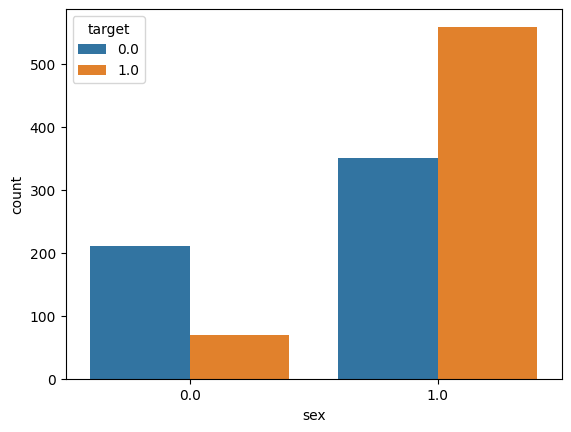

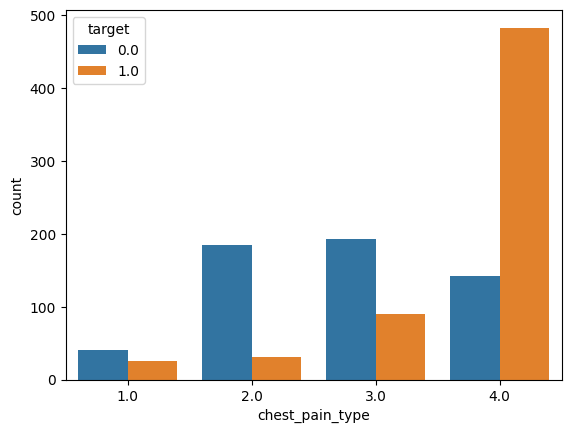

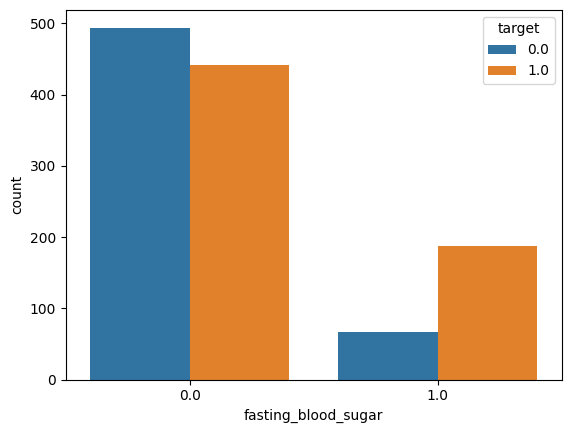

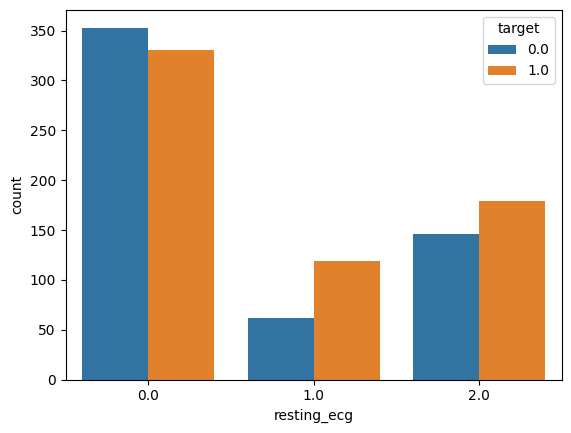

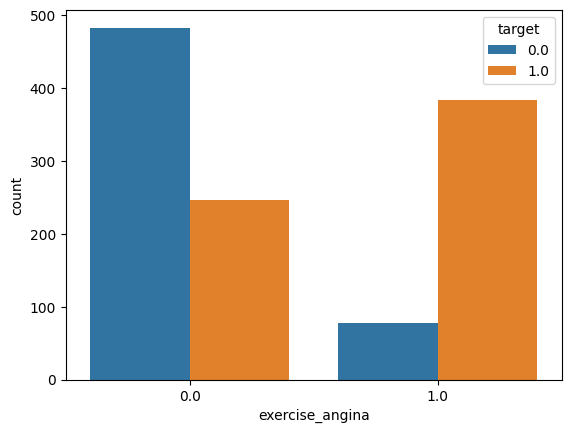

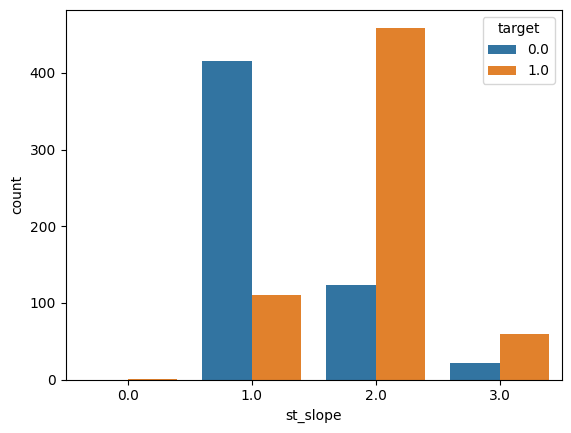

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_cols:
    if col != 'target':
        sns.countplot(x=col, hue='target', data=data)
        plt.show()

#### Descriptive statistics for numerical columns


In [49]:
data.describe()

,age,resting_bps,cholesterol,max_heart_rate,old_peak
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,132.153782,210.363866,139.732773,0.922773
std,9.358203,18.368823,101.420489,25.517636,1.086337
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,188.000000,121.000000,0.000000
50%,54.000000,130.000000,229.000000,140.500000,0.600000
75%,60.000000,140.000000,269.750000,160.000000,1.600000
max,77.000000,200.000000,603.000000,202.000000,6.200000


#### Histograms for numerical columns


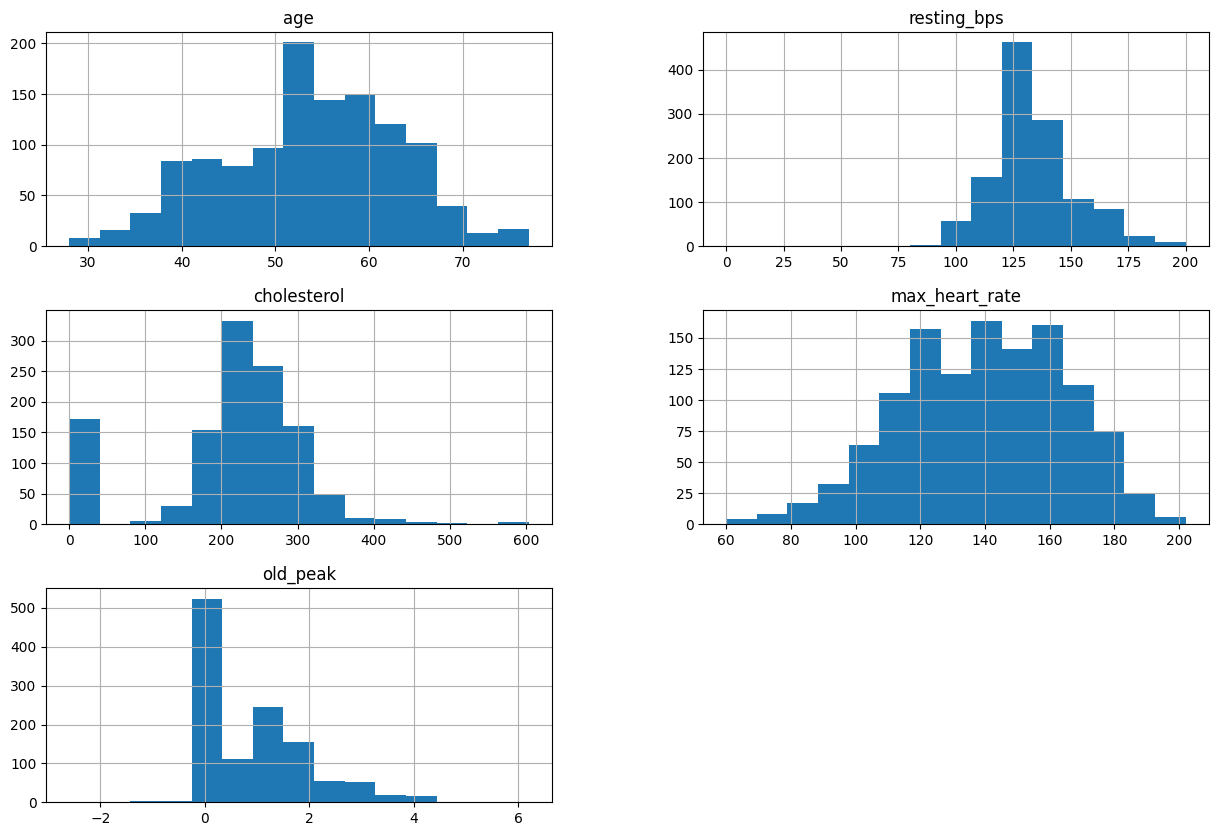

In [50]:
data.hist(bins=15, figsize=(15, 10))
plt.show()

#### Correlation matrix

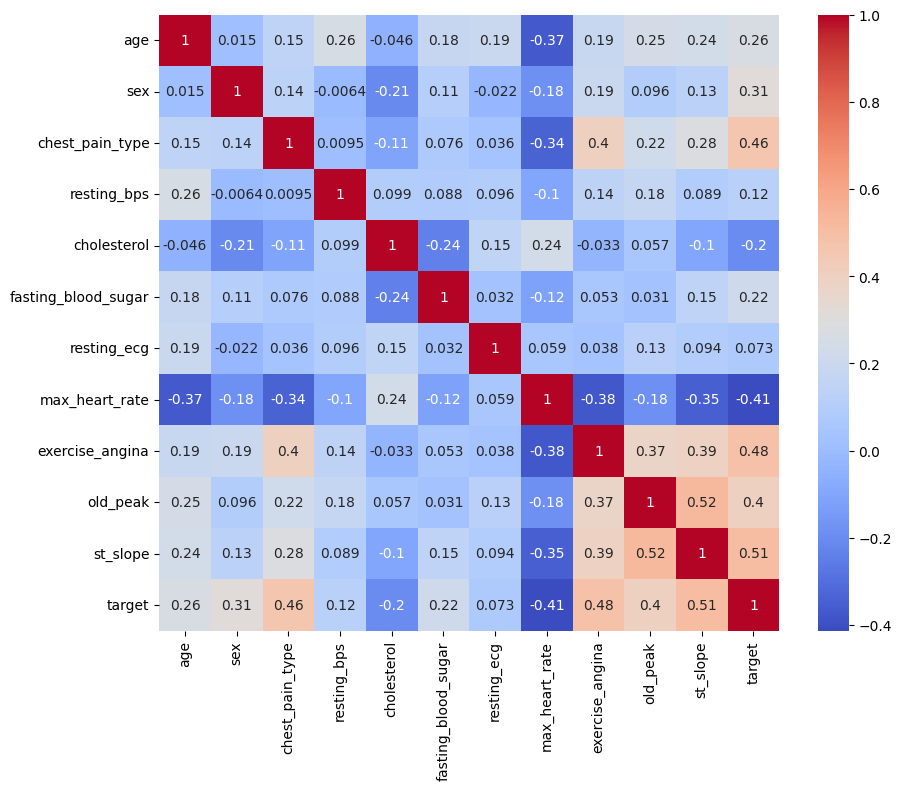

In [52]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()